In [1]:
import geopandas
import pandas
import pathlib
import numpy
import matplotlib
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
sampling_resolution = 10
threshold = 1

## Load in results
### Widths and slopes

In [3]:
width_file = pathlib.Path(fr"C:\Users\pearsonra\Documents\data\river_bathemetry\westport\caches\6350000000\final_transect_values.geojson")
rec_main_channel_file = pathlib.Path(fr"C:\Users\pearsonra\Documents\data\river_bathemetry\westport\caches\6350000000\rec_main_channel.geojson")
widths = geopandas.read_file(width_file)
main_channel = geopandas.read_file(rec_main_channel_file)

In [4]:
widths.columns

Index(['min_z_centre', 'min_z_centre_unimodal', 'min_z_water', 'slope',
       'slope_mean_0.5km', 'slope_mean_1.0km', 'slope_mean_1.5km',
       'slope_mean_2.0km', 'widths', 'widths_mean_0.15km', 'widths_mean_0.2km',
       'widths_mean_0.25km', 'geometry'],
      dtype='object')

### Slopes and Flows

In [5]:
mannings_file = pathlib.Path(r"C:\Users\pearsonra\Documents\data\river_bathemetry\mannings_n\bathy.csv.gz")
mannings = pandas.read_csv(mannings_file)

### Measured cross sections

In [6]:
cross_section_file = pathlib.Path(r"C:/Users/pearsonra/Documents/data/river_bathemetry/sections/Westport/3738_Buller_River_October_2021/3738_Buller_River_October_2021.shp")
cross_section_file_2 = pathlib.Path(r"C:/Users/pearsonra/Documents/data/river_bathemetry/sections/Westport/3738 - Buller River October 2021.xls")
cross_sections = geopandas.read_file(cross_section_file)
cross_section_elevation_label = 'Elevation'
cross_section_name_label = 'Name'

In [21]:
cross_sections.groupby(cross_section_name_label)[cross_section_elevation_label].min()

Name
Section1    -11.33
Section10    -2.19
Section11    -1.94
Section12    -3.79
Section13    -3.61
Section14     1.13
Section15    -3.07
Section16     1.21
Section17     3.59
Section18     5.16
Section19     5.26
Section2     -7.43
Section20     5.26
Section21     4.54
Section22     4.11
Section23     4.83
Section24     8.07
Section25     5.06
Section26    -6.85
Section2A    -8.51
Section2B    -9.47
Section3     -9.06
Section3A    -8.41
Section4     -8.76
Section5     -5.30
Section6     -3.51
Section7     -4.79
Section8     -1.81
Section9     -1.57
Name: Elevation, dtype: float64

In [20]:
cross_sections.head(50)

,Chainage,Offset,North,East,Elevation,Descriptio,Name,geometry
0,0,0,5379501.17,1482467.51,0.48,TEMPMARK1LA,Section1,POINT Z (1482467.510 5379501.170 0.480)
1,10,0,5379503.07,1482477.36,6.50,SPOTHEIGHT,Section1,POINT Z (1482477.360 5379503.070 6.500)
2,13,0,5379503.59,1482480.03,7.72,SPOTHEIGHT,Section1,POINT Z (1482480.030 5379503.590 7.720)
3,18,0,5379504.67,1482485.63,7.30,BEACON1L,Section1,POINT Z (1482485.630 5379504.670 7.300)
4,21,0,5379505.10,1482487.86,7.75,SPOTHEIGHT,Section1,POINT Z (1482487.860 5379505.100 7.750)
5,31,0,5379507.10,1482498.22,0.48,SPOTHEIGHT,Section1,POINT Z (1482498.220 5379507.100 0.480)
6,33,0,5379507.51,1482500.35,-1.06,SPOTHEIGHT,Section1,POINT Z (1482500.350 5379507.510 -1.060)
7,37,0,5379508.09,1482503.39,-3.00,SPOTHEIGHT,Section1,POINT Z (1482503.390 5379508.090 -3.000)
8,39,0,5379508.60,1482506.03,-4.20,SPOTHEIGHT,Section1,POINT Z (1482506.030 5379508.600 -4.200)
9,41,0,5379508.99,1482508.05,-6.08,SPOTHEIGHT,Section1,POINT Z (1482508.050 5379508.990 -6.080)


### Local datum conversion

In [8]:
local_datum_file = pathlib.Path(r"C:\Users\pearsonra\Documents\data\local_datums\lds-wellington-1953-to-nzvd2016-conversion-raster-GTiff\wellington-1953-to-nzvd2016-conversion-raster.tif")

In [9]:
import rioxarray
with rioxarray.rioxarray.open_rasterio(local_datum_file, masked=True) as local_vertical_datum:
            local_vertical_datum.load()

# Translate the samples to correct reach

In [10]:
widths['nzsegment'] = numpy.zeros(len(widths['widths']), dtype=int) * -1
for i, row in main_channel.iterrows():
    widths.loc[widths.intersects(row.geometry), ('nzsegment')] = row['nzsegment']

#### Temporary - manaully set last value

In [11]:
widths.loc[1024:1026, ('nzsegment')]=widths['nzsegment'].iloc[1023]

# Add the flows and manning's n to the widths table

In [12]:
slope_name = 'slope_mean_0.5km'
width_name = 'widths_mean_0.25km'

In [13]:
key_parameters = widths[['nzsegment', slope_name, width_name, 'geometry', 'min_z_centre', 'min_z_centre_unimodal']]
key_parameters = key_parameters[key_parameters['nzsegment'] != 0]

In [14]:
key_parameters['mannings_n'] = numpy.zeros(len(key_parameters['nzsegment']), dtype=int)
key_parameters['flow'] = numpy.zeros(len(key_parameters['nzsegment']), dtype=int)
for nzsegment in key_parameters['nzsegment'].unique():
    key_parameters.loc[key_parameters['nzsegment'] == nzsegment, ('mannings_n')] = mannings[mannings['nzsegment'] == nzsegment]['n'].unique()[0]
    key_parameters.loc[key_parameters['nzsegment'] == nzsegment, ('flow')] = mannings[mannings['nzsegment'] == nzsegment]['flow'].unique()[0]

Note a section is out of order, which is why the flow goes down.

<AxesSubplot:>

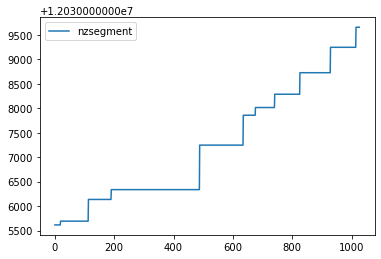

In [15]:
key_parameters[['nzsegment']].plot()

## Calculate depth

In [16]:
key_parameters['depth_Neal_et_al'] = (key_parameters['mannings_n'] * key_parameters['flow'] \
                                      / (numpy.sqrt(key_parameters[slope_name]) * key_parameters[width_name])) ** (3/5) - threshold

C:\Users\pearsonra\Anaconda3\envs\geofabricsdask\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [78]:
a = 0.745
b = 0.305
K_0 = 6.16

In [79]:
key_parameters['depth_Smart_et_al'] = (key_parameters['flow'] / (K_0 * key_parameters['widths_mean_0.15km'] * key_parameters['slope_2.0km_smoothing'] ** b)) ** (1 / (1+a)) - threshold

## Plot results
Include plots of each parameter - Manning's n, flow, depth and slope - used to calculate depth

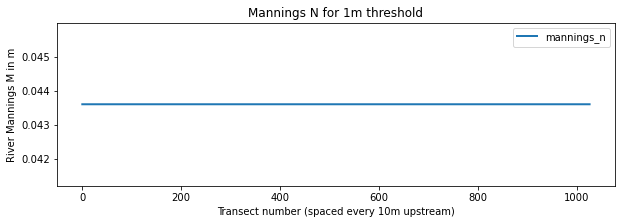

In [80]:
f, ax = matplotlib.pyplot.subplots(figsize=(10, 3))
key_parameters[['mannings_n']].plot(ax=ax, linewidth=2)
ax.set(title=f"Mannings N for {threshold}m threshold")
matplotlib.pyplot.xlabel(f"Transect number (spaced every {sampling_resolution}m upstream)")
matplotlib.pyplot.ylabel(f"River Mannings M in m");

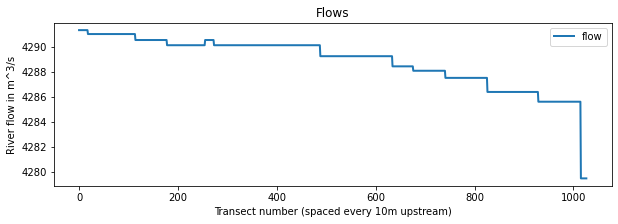

In [81]:
f, ax = matplotlib.pyplot.subplots(figsize=(10, 3))
key_parameters[['flow']].plot(ax=ax, linewidth=2)
ax.set(title=f"Flows")
matplotlib.pyplot.xlabel(f"Transect number (spaced every {sampling_resolution}m upstream)")
matplotlib.pyplot.ylabel(f"River flow in m^3/s");

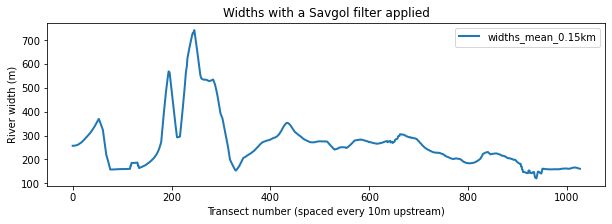

In [83]:
f, ax = matplotlib.pyplot.subplots(figsize=(10, 3))
key_parameters[['widths_mean_0.15km']].plot(ax=ax, linewidth=2)
ax.set(title=f"Widths with a Savgol filter applied")
matplotlib.pyplot.xlabel(f"Transect number (spaced every {sampling_resolution}m upstream)")
matplotlib.pyplot.ylabel(f"River width (m)");

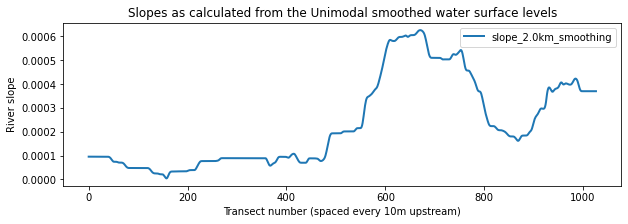

In [84]:
f, ax = matplotlib.pyplot.subplots(figsize=(10, 3))
key_parameters[['slope_2.0km_smoothing']].plot(ax=ax, linewidth=2)
ax.set(title=f"Slopes as calculated from the Unimodal smoothed water surface levels")
matplotlib.pyplot.xlabel(f"Transect number (spaced every {sampling_resolution}m upstream)")
matplotlib.pyplot.ylabel(f"River slope");

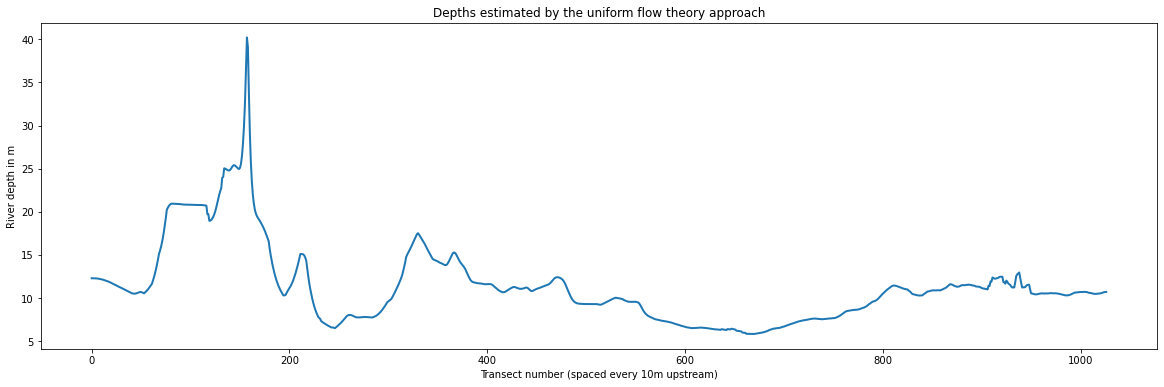

In [85]:
f, ax = matplotlib.pyplot.subplots(figsize=(20, 6))
key_parameters['depth_Neal_et_al'].plot(ax=ax, linewidth=2)
ax.set(title=f"Depths estimated by the uniform flow theory approach")
matplotlib.pyplot.xlabel(f"Transect number (spaced every {sampling_resolution}m upstream)")
matplotlib.pyplot.ylabel(f"River depth in m");

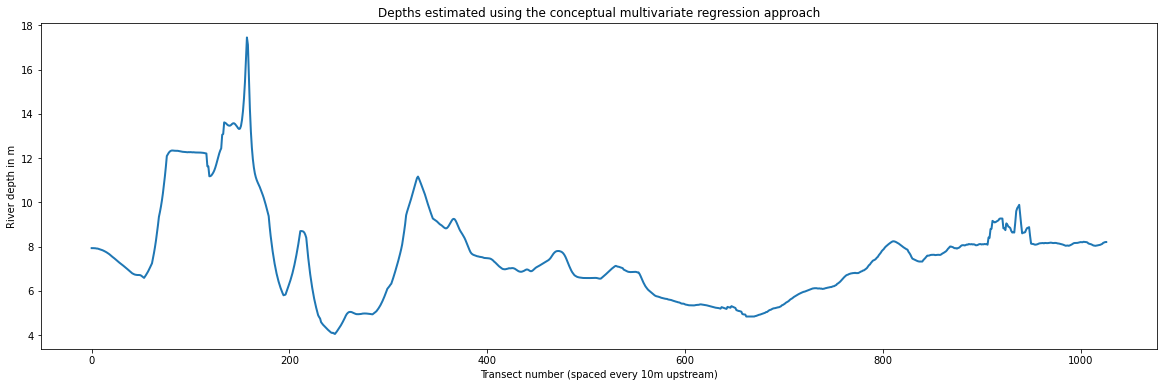

In [86]:
f, ax = matplotlib.pyplot.subplots(figsize=(20, 6))
key_parameters['depth_Smart_et_al'].plot(ax=ax, linewidth=2)
ax.set(title="Depths estimated using the conceptual multivariate regression approach")
matplotlib.pyplot.xlabel(f"Transect number (spaced every {sampling_resolution}m upstream)")
matplotlib.pyplot.ylabel(f"River depth in m");

## Measured cross sections

Plot minimum height (i.e height of the bed)

Add the LVD conversion

In [90]:
def get_lvd_conversion(geometry, local_vertical_datum):
    return local_vertical_datum.sel({'x': [geometry.x], 'y': [geometry.y]}, method='nearest').data[0,0,0]

cross_sections['lvd_conversion'] = cross_sections.apply(lambda row: get_lvd_conversion(row.geometry, local_vertical_datum), axis=1)
cross_sections['z_2016'] = cross_sections[cross_section_elevation_label] - cross_sections['lvd_conversion']

Pull out the centre point for each section - for idntification of the nearest sampled transect

In [95]:
section_centres = {'Section': [], 'geometry': []}
for section in cross_sections[cross_section_name_label].unique():
    section_centre = cross_sections[cross_sections[cross_section_name_label] == section].iloc[round(len(cross_sections[cross_sections[cross_section_name_label] == section])/2)]
    section_centres['Section'].append(section_centre[cross_section_name_label])
    section_centres['geometry'].append(section_centre['geometry'])
section_centres = geopandas.GeoDataFrame(section_centres, crs=main_channel.crs)

Cycle through each section identifying the nearest section in the key parameters

In [97]:
nearest_transect = numpy.zeros_like(key_parameters['slope_2.0km_smoothing'], dtype=bool)
for index, row in section_centres.iterrows():
    nearest_transect[key_parameters.distance(row.geometry).argmin()] = True

nearest_key_parameters = key_parameters[nearest_transect]

### Compare the depth results for different min_z values

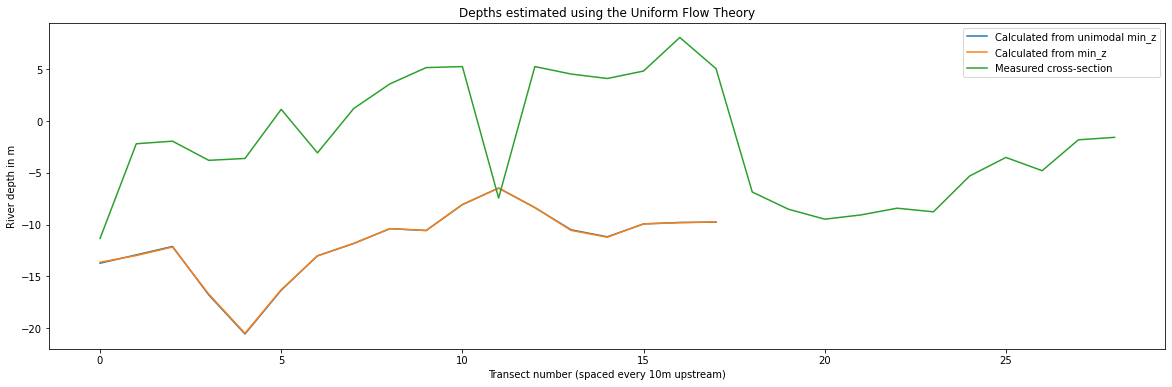

In [101]:
f, ax = matplotlib.pyplot.subplots(figsize=(20, 6))
(nearest_key_parameters['min_z_centre_unimodal']-nearest_key_parameters['depth_Neal_et_al']).reset_index(drop=True).plot(label='Calculated from unimodal min_z')
(nearest_key_parameters['min_z_centre']-nearest_key_parameters['depth_Neal_et_al']).reset_index(drop=True).plot(label='Calculated from min_z')
cross_sections.groupby(cross_section_name_label)[cross_section_elevation_label].min().reset_index(drop=True).plot(label='Measured cross-section')
ax.set(title="Depths estimated using the Uniform Flow Theory")
matplotlib.pyplot.xlabel(f"Transect number (spaced every {sampling_resolution}m upstream)")
matplotlib.pyplot.ylabel(f"River depth in m");
matplotlib.pyplot.legend()

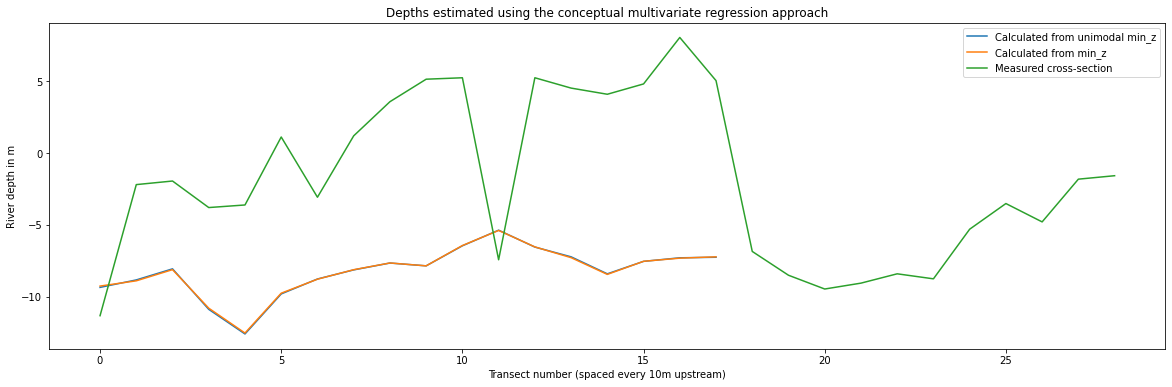

In [102]:
f, ax = matplotlib.pyplot.subplots(figsize=(20, 6))
(nearest_key_parameters['min_z_centre_unimodal']-nearest_key_parameters['depth_Smart_et_al']).reset_index(drop=True).plot(label='Calculated from unimodal min_z')
(nearest_key_parameters['min_z_centre']-nearest_key_parameters['depth_Smart_et_al']).reset_index(drop=True).plot(label='Calculated from min_z')
cross_sections.groupby(cross_section_name_label)[cross_section_elevation_label].min().reset_index(drop=True).plot(label='Measured cross-section')
ax.set(title="Depths estimated using the conceptual multivariate regression approach")
matplotlib.pyplot.xlabel(f"Transect number (spaced every {sampling_resolution}m upstream)")
matplotlib.pyplot.ylabel(f"River depth in m");
matplotlib.pyplot.legend()

Plot the nearest widths

### Plot other values
* Widths - nearest the measured cross sections
* Measured cross section depth compared to water surface height

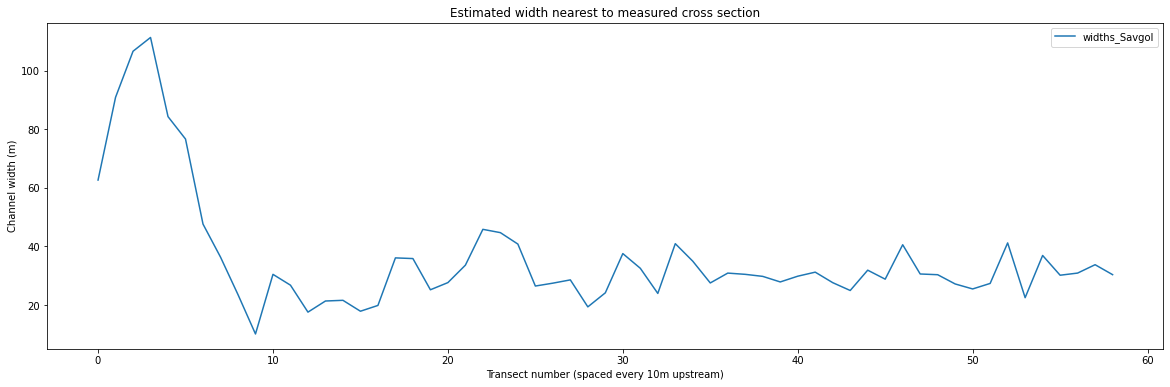

In [49]:
f, ax = matplotlib.pyplot.subplots(figsize=(20, 6))
nearest_key_parameters[['widths_Savgol']].reset_index(drop=True).plot(ax=ax)
ax.set(title="Estimated width nearest to measured cross section")
matplotlib.pyplot.xlabel(f"Transect number (spaced every {sampling_resolution}m upstream)")
matplotlib.pyplot.ylabel(f"Channel width (m)");
matplotlib.pyplot.legend()

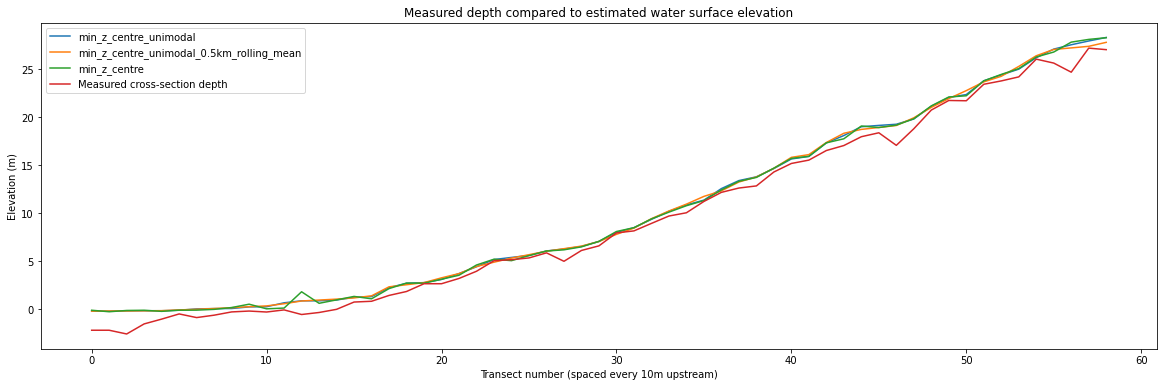

In [50]:
f, ax = matplotlib.pyplot.subplots(figsize=(20, 6))
nearest_key_parameters[['min_z_centre_unimodal', 'min_z_centre_unimodal_0.5km_rolling_mean', 'min_z_centre']].reset_index(drop=True).plot(ax=ax)
cross_sections.groupby('Section')['z_2016'].min().reset_index(drop=True).plot(ax=ax, label='Measured cross-section depth')
ax.set(title="Measured depth compared to estimated water surface elevation")
matplotlib.pyplot.xlabel(f"Transect number (spaced every {sampling_resolution}m upstream)")
matplotlib.pyplot.ylabel(f"Elevation (m)");
matplotlib.pyplot.legend()

### Plots exploring the change to width to produce an expected bed elevation

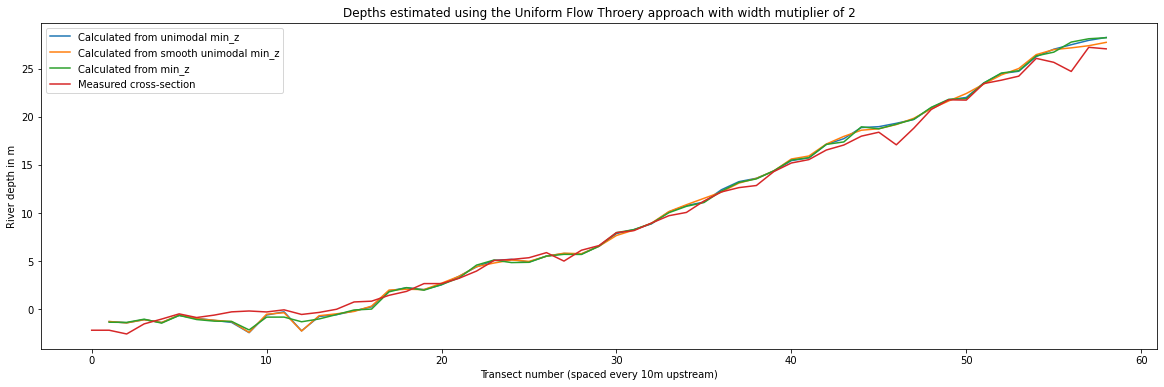

In [52]:
fudge_factor = 2
depth_wider = (nearest_key_parameters['mannings_n'] * nearest_key_parameters['flow'] / (numpy.sqrt(nearest_key_parameters['slope']) * nearest_key_parameters['widths_Savgol'] * fudge_factor)) ** (3/5) - threshold

f, ax = matplotlib.pyplot.subplots(figsize=(20, 6))
(nearest_key_parameters['min_z_centre_unimodal']-depth_wider).reset_index(drop=True).plot(label='Calculated from unimodal min_z')
(nearest_key_parameters['min_z_centre_unimodal_0.5km_rolling_mean'] - depth_wider).reset_index(drop=True).plot(label='Calculated from smooth unimodal min_z')
(nearest_key_parameters['min_z_centre']-depth_wider).reset_index(drop=True).plot(label='Calculated from min_z')
cross_sections.groupby('Section')['z_2016'].min().reset_index(drop=True).plot(label='Measured cross-section')
ax.set(title=f"Depths estimated using the Uniform Flow Throery approach with width mutiplier of {fudge_factor}")
matplotlib.pyplot.xlabel(f"Transect number (spaced every {sampling_resolution}m upstream)")
matplotlib.pyplot.ylabel(f"River depth in m");
matplotlib.pyplot.legend()

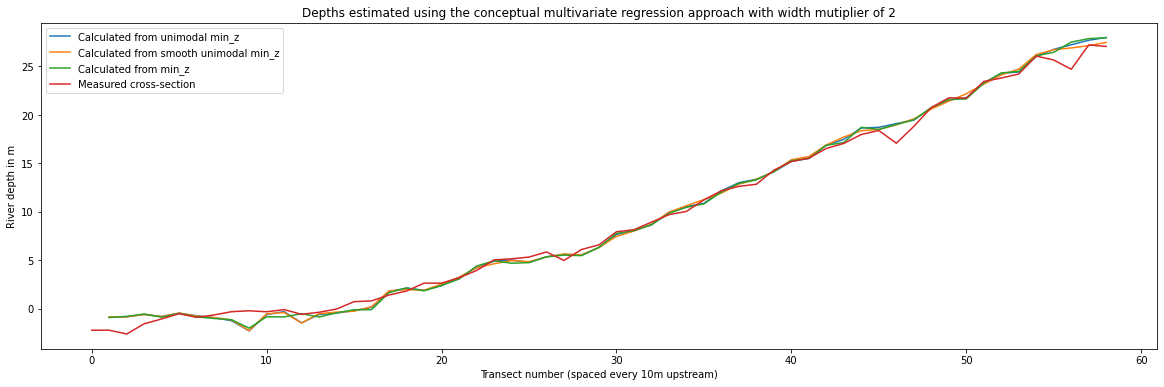

In [51]:
fudge_factor = 2
depth_wider = (nearest_key_parameters['flow'] / (K_0 * nearest_key_parameters['widths_Savgol'] * fudge_factor * nearest_key_parameters['slope'] ** b)) ** (1 / (1+a)) - threshold

f, ax = matplotlib.pyplot.subplots(figsize=(20, 6))
(nearest_key_parameters['min_z_centre_unimodal']-depth_wider).reset_index(drop=True).plot(label='Calculated from unimodal min_z')
(nearest_key_parameters['min_z_centre_unimodal_0.5km_rolling_mean']-depth_wider).reset_index(drop=True).plot(label='Calculated from smooth unimodal min_z')
(nearest_key_parameters['min_z_centre']-depth_wider).reset_index(drop=True).plot(label='Calculated from min_z')
cross_sections.groupby('Section')['z_2016'].min().reset_index(drop=True).plot(label='Measured cross-section')
ax.set(title=f"Depths estimated using the conceptual multivariate regression approach with width mutiplier of {fudge_factor}")
matplotlib.pyplot.xlabel(f"Transect number (spaced every {sampling_resolution}m upstream)")
matplotlib.pyplot.ylabel(f"River depth in m");
matplotlib.pyplot.legend()

### Mics plots for reference: 
Water levels for 10m spaced transects

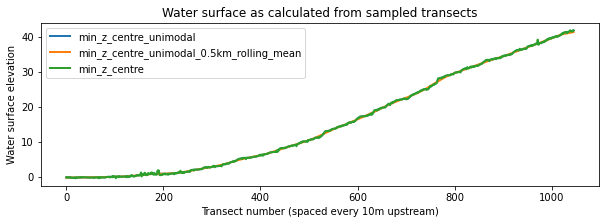

In [54]:
f, ax = matplotlib.pyplot.subplots(figsize=(10, 3))
key_parameters[['min_z_centre_unimodal', 'min_z_centre_unimodal_0.5km_rolling_mean', 'min_z_centre']].plot(ax=ax, linewidth=2)
ax.set(title=f"Water surface as calculated from sampled transects")
matplotlib.pyplot.xlabel(f"Transect number (spaced every {sampling_resolution}m upstream)")
matplotlib.pyplot.ylabel(f"Water surface elevation");

Widths at 10m spacing

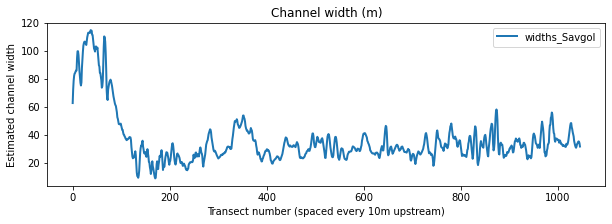

In [55]:
f, ax = matplotlib.pyplot.subplots(figsize=(10, 3))
key_parameters[['widths_Savgol']].plot(ax=ax, linewidth=2)
ax.set(title="Channel width (m)")
matplotlib.pyplot.xlabel(f"Transect number (spaced every {sampling_resolution}m upstream)")
matplotlib.pyplot.ylabel(f"Estimated channel width");